# 数组
## 数组的 3 句话核心

1. **数组 = 同类型元素在一整块连续内存**
     → 计算地址 = `起始地址 + index × 元素大小`，随机访问 O(1)。

2. **Python 真正的“连续数组”**：`array.array('i')`、`bytes/bytearray`、`memoryview`、`numpy.ndarray`；
   **Python `list` 只是连续的 *指针槽位*，元素对象本身散落各处**。

3. 优势与代价：

   * 连续存储带来高速缓存友好、随机访问快；
   * 长度固定，插入/删除需搬迁数据，扩容需整块重拷。


In [12]:
a = [1001, 1003, 1002, 1004, 1005]

for i, v in enumerate(a):
    print(f"Index: {i}, id: {id(a[i])}")

Index: 0, id: 1209530446512
Index: 1, id: 1209530433744
Index: 2, id: 1209530441968
Index: 3, id: 1209530437744
Index: 4, id: 1209530437712


## 53.最大子数组和
**给定整数数组 nums，求连续子数组（至少包含一个元素）的 最大和**

In [13]:
from typing import List
class Solution:
    "核心思想——“如果当前累加的和变成了负数，就抛弃它”，复杂度O（n）"
    def maxSubArray(self, nums: List[int]) -> int:
        max_score = cur_score = nums[0]
        for i in range(1, len(nums)):
            cur_score = nums[i] if cur_score < 0 else cur_score + nums[i]
            max_score = max(max_score, cur_score)
        return max_score
    
a = [10, -11, -6, 17, -10, -10, 12]
b = Solution()
print(b.maxSubArray(a))

17


**时间复杂度分析**

该算法只对数组进行了一次线性遍历。循环从索引 1 到 n−1，每一步只包含常数次比较与加法操作，不存在嵌套循环或递归。因此，整体**时间复杂度为 O(n)**，其中 n 是数组长度。

**空间复杂度分析**

算法只使用了两个变量 `cur_score` 和 `max_score` 来维护当前子数组和与全局最大值，没有使用额外的数组或递归调用栈，输入数组本身也未被复制。因此，**额外空间复杂度为 O(1)**。

**总结**

* 时间复杂度：O(n)
* 空间复杂度：O(1)

该实现即经典的 Kadane 算法，其本质是通过“当前和为负则舍弃”的贪心策略，在一次遍历中完成最大子数组和的计算。

---


### 56.合并区间

给定区间集合 **\[1 , 3] , \[2 , 6] , \[8 , 10] , \[15 , 18]**。
已按左端点从小到大排序，下面按步骤合并。

解题思路：

1. **初始化**

   * 把 `intervals[0] = [1, 3]` 加入答案，作为当前正在合并的区间。
   * 现在 *合并区间* = **\[1 , 3]**。

2. **处理 `intervals[1] = [2, 6]`**

   * 左端点 `2 ≤ 3`，与当前区间重叠 → **可合并**。
   * 更新右端点：`max(3, 6) = 6`
   * 合并区间变为 **\[1 , 6]**（左端点无需改动）。

3. **处理 `intervals[2] = [8, 10]`**

   * 左端点 `8 > 6`，与当前区间不重叠 → **不能合并**。
   * **\[1 , 6]** 已确定，加入答案；开始新的合并区间 **\[8 , 10]**。

4. **处理 `intervals[3] = [15, 18]`**

   * 左端点 `15 > 10`，仍不重叠。
   * **\[8 , 10]** 固定并加入答案；最后把 **\[15 , 18]** 作为新合并区间加入。

#### 最终结果
[[1, 6], [8, 10], [15, 18]]


In [14]:
class Solution:
    def merge(self, intervals: List[List[int]]) -> List[List[int]]:
        intervals.sort(key = lambda x: x[0])
        output = [intervals[0], ]
        for i in intervals[1:]:
            last_interval = output[-1]
            if last_interval[-1] >= i[0]:
                last_interval[-1] = max(last_interval[-1], i[-1])
            else:
                output.append(i)
        return output
a = [[1,3],[2,6],[8,10],[15,18]]
b = Solution()
print(b.merge(a))

[[1, 6], [8, 10], [15, 18]]


**复杂度分析：**

时间复杂度由两部分构成。首先对区间数组按起点排序，排序复杂度为 **O(n log n)**，其中 n 是区间数量；随后进行一次线性扫描并合并区间，遍历过程中每个区间只处理一次，时间复杂度为 **O(n)**。因此整体**时间复杂度为 O(n log n)**，由排序步骤主导。

空间复杂度方面，算法使用了一个结果列表 `output` 来存储合并后的区间。在最坏情况下（区间完全不重叠），`output` 需要存放 n 个区间，因此**额外空间复杂度为 O(n)**。若不将返回结果计入额外空间，则除排序可能使用的内部栈空间外，算法本身只使用常数级辅助变量。

---


# 轮转数组（LeetCode189）
给定一个整数数组 nums，将数组中的元素向右轮转 k 个位置，其中 k 是非负数。
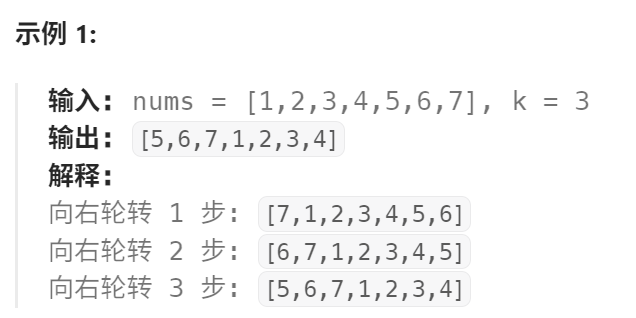

核心思路:

1.把整个数组反转

2.反转前 k 个元素

3.反转后 n-k 个元素，三次反转即可把后 k 个元素移到前面，实现向右轮转。

In [15]:
class Solution:
    def rotate(self, nums: List[int], k: int) -> None:
        n = len(nums)
        k = k%n

        def reverse(left, right):
            right = right - 1
            while left < right:
                nums[left], nums[right] = nums[right], nums[left]
                left += 1
                right -= 1

        reverse(0, n)
        reverse(0, k)
        reverse(k, n)
a = [1,2,3,4,5,6,7]
b = Solution()
b.rotate(a, 3)
print(a)

[5, 6, 7, 1, 2, 3, 4]


**复杂度分析：**

该算法通过三次区间反转完成数组旋转。每一次 `reverse` 操作都在指定区间内进行首尾交换，区间长度分别为 n、k 和 n−k，但三次反转中所有元素被交换的总次数与 n 成正比，因此整体**时间复杂度为 O(n)**。

算法只使用了少量临时变量（用于元素交换和指针移动），未创建任何新的数组或递归结构，除输入数组本身外不占用额外存储空间，因此**空间复杂度为 O(1)**。

---

## 238.除以自身以外数组的乘积

给你一个整数数组 nums，返回 数组 answer ，其中 answer[i] 等于 nums 中除了 nums[i] 之外其余各元素的乘积 。

题目数据 保证 数组 nums之中任意元素的全部前缀元素和后缀的乘积都在  32 位 整数范围内。

请 不要使用除法，且在 O(n) 时间复杂度内完成此题。


**核心思想：**
用“前缀积 × 后缀积”替代除法。对每个下标 i，答案是 *nums* 左边所有元素乘积（前缀积）与右边所有元素乘积（后缀积）的乘积。

用输出数组本身存前缀积，再用一个常量变量滚动后缀积

* **首扫**：顺序遍历，把 *i* 左侧元素乘积直接写进 `ans[i]`。
* **次扫**：逆序遍历，用变量 `R` 累乘右侧元素；边更新 `R` 边把结果乘回 `ans[i]`。
  这样只额外用到一个整数 `R`，把额外空间降到 **O(1)**（题目默认不计输出数组）。
  
* **相当于把ans作为原来的左缀积L，而R实时更新，从右到左，直接乘到ans上**

In [16]:
class Solution:
    def productExceptSelf(self, nums: List[int]) -> List[int]:
        n = len(nums)
        ans = [1] * n

        # 前缀积：i 从 1 开始，跳过 0
        for i in range(1, n):
            ans[i] = ans[i-1] * nums[i-1]

        # 后缀积：i 从 n-1 到 0，必须含 0
        R = 1
        for i in range(n-1, -1, -1):
            ans[i] *= R    # 先用
            R *= nums[i]   # 再乘

        return ans


**复杂度**

* 时间：两次线性遍历 → **O(n)**
* 空间：只用常量→ **O(1)** 额外空间（不含输出数组）

---

## 41.缺失的第一个正数

给你一个未排序的整数数组 nums ，请你找出其中没有出现的最小的正整数。
请你实现时间复杂度为 O(n) 并且只使用常数级别额外空间的解决方案。

### 原地哈希法核心思想
**将数组本身当作哈希表，用索引位置表示数字，用符号表示该数字是否存在**

- 索引 i 代表数字 i+1
- 负数表示该位置对应的数字存在
- 正数表示该位置对应的数字不存在
### 关键注意点

#### 1. 符号处理
- **读取时**：必须用 `abs(nums[i])` 获取原始数值
- **标记时**：用 `-abs(nums[num-1])` 确保变为负数，避免重复标记

#### 2. 边界控制
- **范围检查**：只处理 `1 ≤ num ≤ n` 的数字
- **预处理**：将 `n+1` 作为占位符，因为它不会影响 [1,n] 的标记

#### 3. 映射关系
- **数字 x** → **索引 x-1**
- **索引 i** → **数字 i+1**

### 举例演示

```
原数组: [3, 4, -1, 1]  (n=4)

步骤1: [3, 4, 5, 1]     # -1改为5
步骤2: 
  - 看到3，标记索引2：[3, 4, -5, 1]
  - 看到4，标记索引3：[3, 4, -5, -1]  
  - 看到5，超出范围，跳过
  - 看到1，标记索引0：[-3, 4, -5, -1]
步骤3: 索引1为正数，返回 1+1 = 2
```

**核心优势**：O(1) 空间复杂度，充分利用数组索引和符号的双重信息。

In [17]:
def firstMissingPositive(nums):
    n = len(nums)
    
    # 第一步：将所有非正数和大于n的数改为n+1
    # 这样确保数组中只有[1,n+1]范围内的数
    for i in range(n):
        if nums[i] <= 0:
            nums[i] = n + 1
    
    # 第二步：利用符号标记存在性
    # 对于数字x，将索引x-1位置的数字标记为负数
    for i in range(n):
        num = abs(nums[i]) #因为下面的操作会将nums[i]的值由正变负，所以需要取绝对值
        if num <= n:
            nums[num - 1] = -abs(nums[num - 1])
    
    # 第三步：找到第一个正数的位置
    for i in range(n):
        if nums[i] > 0:
            return i + 1
    
    # 如果所有位置都被标记了，说明[1,n]都存在
    return n + 1
a = [3, 4, -1, 1]
print(firstMissingPositive(a))

2


**复杂度分析：**

该算法对数组进行了三次线性遍历，每一次遍历中仅包含常数次操作（比较、取绝对值、赋值），不存在嵌套循环或递归。因此，整体**时间复杂度为 O(n)**，其中 n 为数组长度。

空间复杂度方面，算法直接在原数组 `nums` 上进行数值覆盖与符号标记，仅使用了少量临时变量（如 `n`、`i`、`num`），未引入额外的辅助数组或递归栈。因此，**额外空间复杂度为 O(1)**。

---
